# CUSTOMER LIFETIME VALUE
- It is the monetary value that a customer brings to a company over the course of a relationship with that company. If we can determine the value that our customers can provide us in the future, we can organize our relationships with our customers and as a company, we can exhibit a more value-added approach in the customer-oriented medium and long term. Calculating this value will also play an important role in determining the budgets to be allocated in the field of marketing activities. If we know this value CLTV, if we know the current customer value, if we calculate the cost to be spent to gain new customers, we can compare the cost required to gain new customers with the existing ones and we can take a healthier approach.

# Customer Lifetime Value Calculation
- Since this calculated value does not have a time projection aspect, it does not allow us to make a forward-looking prediction. However, it will be a very valuable study in terms of determining the values of existing customers.

# Road Map
- **1. Data Preparation**
- **2. Average Order Value (average_order_value = total_price / total_transaction)**
- **3. Purchase Frequency (total_transaction / total_number_of_customers)**
- **4. Repeat Rate & Churn Rate (number of customers making more than one purchase / all customers)**
- **5. Profit Margin (profit_margin = total_price * 0.10)**
- **6. Customer Value (customer_value = average_order_value * purchase_frequency)**
- **7. Customer Lifetime Value (CLTV = (customer_value / churn_rate) x profit_margin)**
- **8. Creation of Segments**

# Business Problem
- Calculating Customer Life Time Value values for each customer, then segmenting customers according to these customer life time values.

# Data Story

- The dataset, Online Retail II, contains the sales of a UK-based online retail store between 01/12/2009 and 09/12/2011.

- **Variables**
- **InvoiceNo:** Invoice number. Unique number for each transaction, i.e. invoice. Canceled transaction if it starts with C.
- **StockCode:** Product code. Unique number for each product.
- **Description:** Product name
- **Quantity:** Number of products. This refers to the number of products sold from the invoices.
- **InvoiceDate:** Invoice date and time.
- **UnitPrice:** Product price (in pounds sterling)
- **CustomerID:** Unique customer number
- **Country:** Country name The country where the customer lives.

In [1]:
# import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.simplefilter(action="ignore")

In [2]:
# Adjusting Row Column Settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
# Loading the Data Set
df1 = pd.read_excel('/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx', sheet_name='Year 2009-2010')
df2 = pd.read_excel('/kaggle/input/uci-online-retail-ii-data-set/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [4]:
df = pd.concat([df1, df2], ignore_index=True)

In [5]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom


In [6]:
# Preliminary examination of the data set
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

check_df(df)

##################### Shape #####################
(1067371, 8)
##################### Types #####################
Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object
##################### Head #####################
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95     13085.00  United Kingdom  
1 2009-12-01 07:45:00   6.75     13085.00  

In [7]:
# Examination of numerical and categorical variables

def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.
    Parameters
    ------
         dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 1067371
Variables: 8
cat_cols: 0
num_cols: 4
cat_but_car: 4
num_but_cat: 0


In [8]:
# We selected the sales with a sales number greater than zero from df and reassigned it to the df variable. 
#The reason for doing this is to remove the purchase returns from the data set.

df = df[(df['Quantity'] > 0)]

In [9]:
df['Quantity'].head()

0    12
1    12
2    12
3    48
4    24
Name: Quantity, dtype: int64

In [10]:
# From the observations in the dataset, we selected the observations that do not contain the C expression.
df = df[df["Invoice"].astype(str).str.contains("C")==False]

In [11]:
# We removed empty observations from the data set.
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [13]:
# Creation of TotalPrice
df["TotalPrice"] = df["Quantity"] * df["Price"]

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00


In [15]:
# cltv_c is short name of custome life time value calculation
cltv_c = df.groupby("Customer ID").agg({"Invoice": lambda Invoice: Invoice.nunique(),
                                      "Quantity": lambda Quantity: Quantity.sum(), 
                                      "TotalPrice": lambda TotalPrice: TotalPrice.sum()})

In [16]:
cltv_c.head()

,Invoice,Quantity,TotalPrice
Customer ID,,,
12346.00,12,74285,77556.46
12347.00,8,3286,5633.32
12348.00,5,2714,2019.40
12349.00,4,1624,4428.69
12350.00,1,197,334.40


In [17]:
# Changing column names
cltv_c.columns = ["total_transaction", "total_unit", "total_price"]

In [18]:
cltv_c.head()

,total_transaction,total_unit,total_price
Customer ID,,,
12346.00,12,74285,77556.46
12347.00,8,3286,5633.32
12348.00,5,2714,2019.40
12349.00,4,1624,4428.69
12350.00,1,197,334.40


# Average Order Value 

**average_order_value = total_price / total_transaction**

In [19]:
cltv_c["average_order_value"] = cltv_c["total_price"] / cltv_c["total_transaction"]

In [20]:
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value
Customer ID,,,,
12346.00,12,74285,77556.46,6463.04
12347.00,8,3286,5633.32,704.17
12348.00,5,2714,2019.40,403.88
12349.00,4,1624,4428.69,1107.17
12350.00,1,197,334.40,334.40


# Purchase Frequency 

**purchase frequency** = **total_transaction / total_number_of_customers**

In [21]:
cltv_c["purchase_frequency"] = cltv_c["total_transaction"] / cltv_c.shape[0]

In [22]:
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency
Customer ID,,,,,
12346.00,12,74285,77556.46,6463.04,0.00
12347.00,8,3286,5633.32,704.17,0.00
12348.00,5,2714,2019.40,403.88,0.00
12349.00,4,1624,4428.69,1107.17,0.00
12350.00,1,197,334.40,334.40,0.00


# Repeat Rate & Churn Rate 
- **repeat rate = (total_transactio >1) / all customers**

In [23]:
# repeat_rate
repeat_rate = cltv_c[cltv_c["total_transaction"] > 1].shape[0] / cltv_c.shape[0]

In [24]:
repeat_rate

0.723516408774018

In [25]:
# churn rate
churn_rate = 1 - repeat_rate

In [26]:
churn_rate

0.276483591225982

# Profit Margin 
- **profit_margin =  total_price * 0.10**

In [27]:
cltv_c["profit_margin"] = cltv_c["total_price"] * 0.10

In [28]:
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin
Customer ID,,,,,,
12346.00,12,74285,77556.46,6463.04,0.00,7755.65
12347.00,8,3286,5633.32,704.17,0.00,563.33
12348.00,5,2714,2019.40,403.88,0.00,201.94
12349.00,4,1624,4428.69,1107.17,0.00,442.87
12350.00,1,197,334.40,334.40,0.00,33.44


# Customer Value 
- **customer_value = average_order_value * purchase_frequency**

In [29]:
cltv_c["customer_value"] = cltv_c["average_order_value"] * cltv_c["purchase_frequency"]

In [30]:
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value
Customer ID,,,,,,,
12346.00,12,74285,77556.46,6463.04,0.00,7755.65,13.19
12347.00,8,3286,5633.32,704.17,0.00,563.33,0.96
12348.00,5,2714,2019.40,403.88,0.00,201.94,0.34
12349.00,4,1624,4428.69,1107.17,0.00,442.87,0.75
12350.00,1,197,334.40,334.40,0.00,33.44,0.06


# Customer Lifetime Value 
- **CLTV = (customer_value / churn_rate) x profit_margin**

In [31]:
cltv_c["cltv"] = (cltv_c["customer_value"] / churn_rate) * cltv_c["profit_margin"]

In [32]:
cltv_c.head()

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
12346.00,12,74285,77556.46,6463.04,0.00,7755.65,13.19,369926.48
12347.00,8,3286,5633.32,704.17,0.00,563.33,0.96,1951.68
12348.00,5,2714,2019.40,403.88,0.00,201.94,0.34,250.80
12349.00,4,1624,4428.69,1107.17,0.00,442.87,0.75,1206.23
12350.00,1,197,334.40,334.40,0.00,33.44,0.06,6.88


In [33]:
cltv_c.sort_values(by="cltv", ascending=False).head(20)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv
Customer ID,,,,,,,,
18102.00,145,188340,608821.65,4198.77,0.02,60882.17,103.52,22796051.75
14646.00,152,367833,528602.52,3477.65,0.03,52860.25,89.88,17184540.23
14156.00,156,165992,313946.37,2012.48,0.03,31394.64,53.38,6061643.50
14911.00,398,150237,295972.63,743.65,0.07,29597.26,50.33,5387441.43
17450.00,51,85368,246973.09,4842.61,0.01,24697.31,42.00,3751273.50
13694.00,143,189205,196482.81,1374.01,0.02,19648.28,33.41,2374261.66
17511.00,60,119656,175603.55,2926.73,0.01,17560.36,29.86,1896470.28
16446.00,2,80997,168472.50,84236.25,0.00,16847.25,28.65,1745570.93
16684.00,55,104810,147142.77,2675.32,0.01,14714.28,25.02,1331549.49


# Creating segment Variable

In [34]:
cltv_c["segment"] = pd.qcut(cltv_c["cltv"], 4, labels=["D", "C", "B", "A"])

In [35]:
cltv_c.head(10)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
12346.00,12,74285,77556.46,6463.04,0.00,7755.65,13.19,369926.48,A
12347.00,8,3286,5633.32,704.17,0.00,563.33,0.96,1951.68,A
12348.00,5,2714,2019.40,403.88,0.00,201.94,0.34,250.80,B
12349.00,4,1624,4428.69,1107.17,0.00,442.87,0.75,1206.23,A
12350.00,1,197,334.40,334.40,0.00,33.44,0.06,6.88,D
12351.00,1,261,300.93,300.93,0.00,30.09,0.05,5.57,D
12352.00,10,724,2849.84,284.98,0.00,284.98,0.48,499.48,A
12353.00,2,212,406.76,203.38,0.00,40.68,0.07,10.18,C
12354.00,1,530,1079.40,1079.40,0.00,107.94,0.18,71.65,B


In [36]:
cltv_c.sort_values(by="cltv", ascending=False).head(10)

,total_transaction,total_unit,total_price,average_order_value,purchase_frequency,profit_margin,customer_value,cltv,segment
Customer ID,,,,,,,,,
18102.00,145,188340,608821.65,4198.77,0.02,60882.17,103.52,22796051.75,A
14646.00,152,367833,528602.52,3477.65,0.03,52860.25,89.88,17184540.23,A
14156.00,156,165992,313946.37,2012.48,0.03,31394.64,53.38,6061643.50,A
14911.00,398,150237,295972.63,743.65,0.07,29597.26,50.33,5387441.43,A
17450.00,51,85368,246973.09,4842.61,0.01,24697.31,42.00,3751273.50,A
13694.00,143,189205,196482.81,1374.01,0.02,19648.28,33.41,2374261.66,A
17511.00,60,119656,175603.55,2926.73,0.01,17560.36,29.86,1896470.28,A
16446.00,2,80997,168472.50,84236.25,0.00,16847.25,28.65,1745570.93,A
16684.00,55,104810,147142.77,2675.32,0.01,14714.28,25.02,1331549.49,A


In [37]:
cltv_c.groupby("segment").agg({"count", "mean", "sum"})

total_transaction              total_unit                   \
                    count    sum  mean      count      sum    mean   
segment                                                              
D                    1471   1911  1.30       1471   199258  135.46   
C                    1470   3643  2.48       1470   505745  344.04   
B                    1470   7014  4.77       1470  1299830  884.24   
A                    1470  24407 16.60       1470  8716088 5929.31   

        total_price                     average_order_value                    \
              count         sum    mean               count        sum   mean   
segment                                                                         
D              1471   286503.06  194.77                1471  243467.99 165.51   
C              1470   852347.92  579.83                1470  437562.15 297.66   
B              1470  2124449.83 1445.20                1470  584790.16 397.82   
A              1470 14480128.36 9850.43                1470 1036698.43 705.24   

        purchase_frequency           profit_margin                    \
                     count  sum mean         count        sum   mean   
segment                                                                
D                     1471 0.32 0.00          1471   28650.31  19.48   
C                     1470 0.62 0.00          1470   85234.79  57.98   
B                     1470 1.19 0.00          1470  212444.98 144.52   
A                     1470 4.15 0.00          1470 1448012.84 985.04   

        customer_value               cltv                       
                 count     sum mean count         sum     mean  
segment                                                         
D                 1471   48.72 0.03  1471     4124.37     2.80  
C                 1470  144.93 0.10  1470    32689.17    22.24  
B                 1470  361.24 0.25  1470   203222.90   138.25  
A                 1470 2462.19 1.67  1470 81558808.67 55482.18

In [38]:
# cltv_c.to_csv("cltc_c.csv")

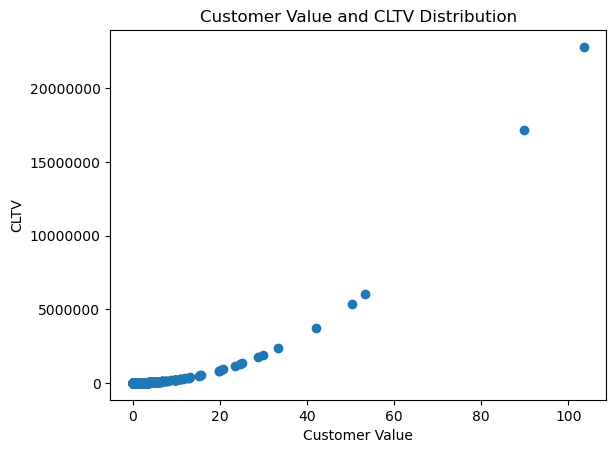

In [39]:
# The relationship between customer_value and customer lifetime value (CLTV)
plt.scatter(cltv_c['customer_value'], cltv_c['cltv'])
plt.title("Customer Value and CLTV Distribution")
plt.xlabel("Customer Value")
plt.ylabel("CLTV")
plt.ticklabel_format(style='plain', axis='both')

# Show the plot
plt.show()



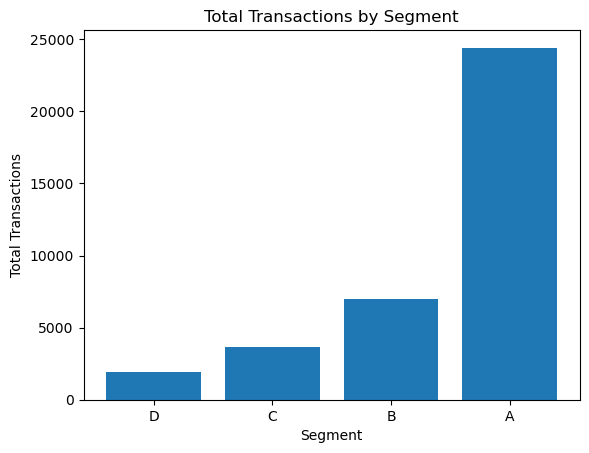

In [40]:
# Calculating total transactions by segment
segment_transaction = cltv_c.groupby('segment')['total_transaction'].sum()

plt.bar(segment_transaction.index, segment_transaction.values)
plt.title("Total Transactions by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Transactions")


plt.show()



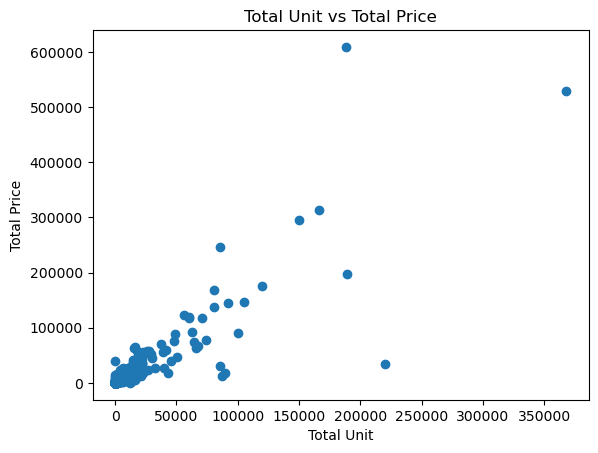

In [41]:
# Total Unit ve Total Price

plt.scatter(cltv_c['total_unit'], cltv_c['total_price'])
plt.title("Total Unit vs Total Price")
plt.xlabel("Total Unit")
plt.ylabel("Total Price")
plt.show()


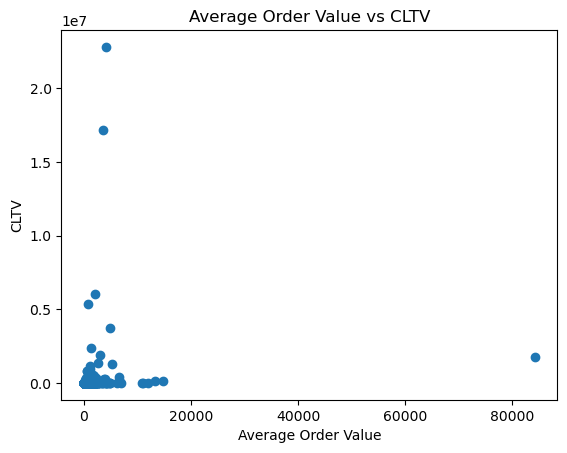

In [42]:
# Average Order Value ve CLTV
plt.scatter(cltv_c['average_order_value'], cltv_c['cltv'])
plt.title("Average Order Value vs CLTV")
plt.xlabel("Average Order Value")
plt.ylabel("CLTV")
plt.show()


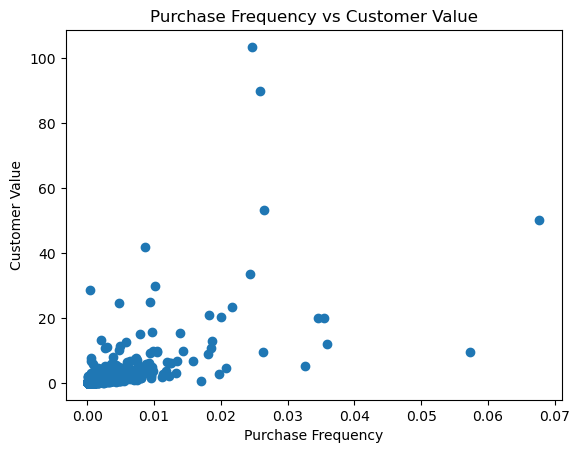

In [43]:
# Purchase Frequency ve Customer Value
plt.scatter(cltv_c['purchase_frequency'], cltv_c['customer_value'])
plt.title("Purchase Frequency vs Customer Value")
plt.xlabel("Purchase Frequency")
plt.ylabel("Customer Value")
plt.show()


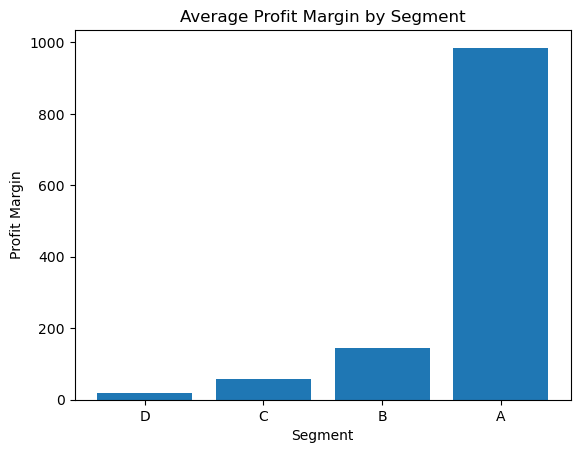

In [44]:
# Profit Margin ve Segment
profit_margin_segment = cltv_c.groupby('segment')['profit_margin'].mean()

plt.bar(profit_margin_segment.index, profit_margin_segment.values)
plt.title("Average Profit Margin by Segment")
plt.xlabel("Segment")
plt.ylabel("Profit Margin")
plt.show()

